# Classifying Heartbeats Using ECG Signals with CNN, AlexNet and LSTM Architectures

### 1) Importing MIT-BIH Arrhythmia Dataset and necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from keras import layers
from keras.layers import concatenate
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPooling1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


### 2) Reading and exploring the data

In [ ]:
train_data = pd.read_csv("/content/drive/My Drive/mitbih_train.csv", header = None)
test_data = pd.read_csv("/content/drive/My Drive/mitbih_test.csv", header = None)

In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


### 3) Checking any null values in train data and catecorizing according to the unique classes

In [ ]:
train_data.isnull().values.any()

False

In [ ]:
train_data.iloc[:, 187].unique()

array([0., 1., 2., 3., 4.])

### 4) Converting data to integer data type

In [ ]:
train_data[187] = train_data[187].astype('int')
test_data[187] = test_data[187].astype('int') 

### 5) Distribution of ECG signal data by classes.As it seems the data is unbalanced data.

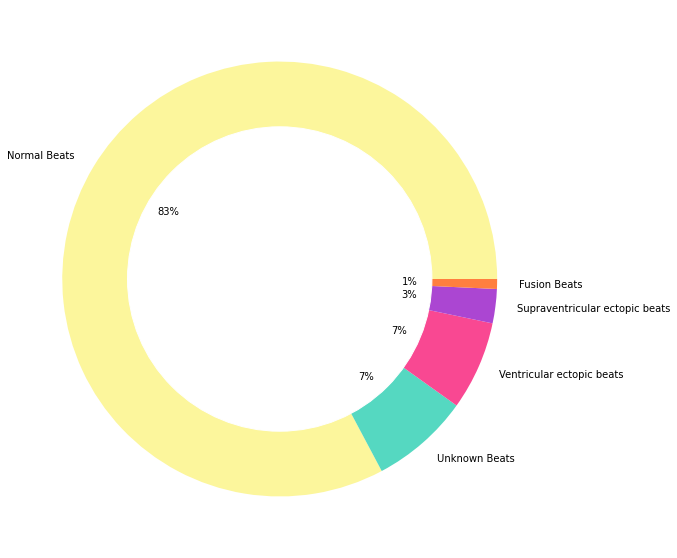

In [ ]:

plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_data[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['#FCF69C','#55D8C1','#F94892','#AB46D2','#FF7F3F'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### 6) Splitting the training data into training and validation data, checking train, validation and test data's sizes.

In [ ]:
from keras.utils import to_categorical
X, y = train_data.iloc[: , :-1], train_data.iloc[: , -1]
X, valid_X, y, valid_y= train_test_split(X,y,test_size=0.2)
test_X, test_y = test_data.iloc[: , :-1], test_data.iloc[: , -1]
y = to_categorical(y)
test_y = to_categorical(test_y)
valid_y=to_categorical(valid_y)

print("X shape = " +str(X.shape))
print("y shape = " +str(y.shape))
print("validation X shape = " +str(valid_X.shape))
print("validation y shape = " +str(valid_y.shape))
print("test X shape = " +str(test_X.shape))
print("test y shape = " +str(test_y.shape))

X shape = (70043, 187)
y shape = (70043, 5)
validation X shape = (17511, 187)
validation y shape = (17511, 5)
test X shape = (21892, 187)
test y shape = (21892, 5)


### 7) Building the custom CNN model.

In [ ]:
CNN_model = Sequential()
   
CNN_model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same', input_shape = (187, 1))) 
   
CNN_model.add(BatchNormalization())   
CNN_model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
CNN_model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
CNN_model.add(Conv1D( filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

CNN_model.add(Flatten())

CNN_model.add(Dense(units = 64, activation='relu'))
    
CNN_model.add(Dense(units = 64, activation='relu'))

CNN_model.add(Dense(units = 5, activation='softmax'))

CNN_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy',
                                                                                    keras.metrics.Precision(name='precision'),
                                                                                    keras.metrics.Recall(name='recall'),
                                                                                    tfa.metrics.F1Score(num_classes=5)])

In [ ]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 64)           448       
                                                                 
 batch_normalization (BatchN  (None, 187, 64)          256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 94, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 94, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 94, 64)           256       
 hNormalization)                                                 
                                                        

### 8) Training the CNN model

In [ ]:
history = CNN_model.fit(X, y, epochs = 15, batch_size = 32, validation_data=(valid_X, valid_y))

Epoch 1/15
2189/2189 [==============================] - 103s 45ms/step - loss: 0.1314 - accuracy: 0.9636 - precision: 0.9665 - recall: 0.9607 - f1_score: 0.8091 - val_loss: 0.0950 - val_accuracy: 0.9730 - val_precision: 0.9746 - val_recall: 0.9717 - val_f1_score: 0.8644
Epoch 2/15
2189/2189 [==============================] - 99s 45ms/step - loss: 0.0744 - accuracy: 0.9791 - precision: 0.9799 - recall: 0.9780 - f1_score: 0.8854 - val_loss: 0.1101 - val_accuracy: 0.9696 - val_precision: 0.9708 - val_recall: 0.9687 - val_f1_score: 0.8332
Epoch 3/15
2189/2189 [==============================] - 93s 42ms/step - loss: 0.0606 - accuracy: 0.9820 - precision: 0.9829 - recall: 0.9813 - f1_score: 0.8973 - val_loss: 0.0804 - val_accuracy: 0.9773 - val_precision: 0.9785 - val_recall: 0.9764 - val_f1_score: 0.8689
Epoch 4/15
2189/2189 [==============================] - 97s 44ms/step - loss: 0.0510 - accuracy: 0.9850 - precision: 0.9858 - recall: 0.9844 - f1_score: 0.9116 - val_loss: 0.0658 - val_accu

### 9) Evaluating the CNN model.Accuracy is 98.52.

In [ ]:
CNN_model.evaluate(test_X, test_y)

685/685 [==============================] - 7s 10ms/step - loss: 0.0854 - accuracy: 0.9852 - precision: 0.9856 - recall: 0.9851 - f1_score: 0.9173


[0.08543718606233597,
 0.985154390335083,
 0.9855589270591736,
 0.9851087331771851,
 array([0.9925914 , 0.8405253 , 0.9590079 , 0.8038586 , 0.99029744],
       dtype=float32)]

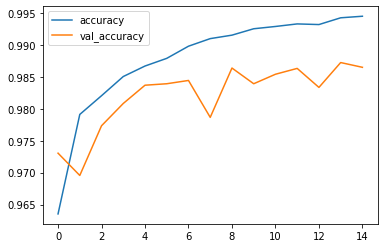

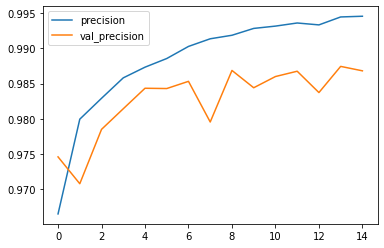

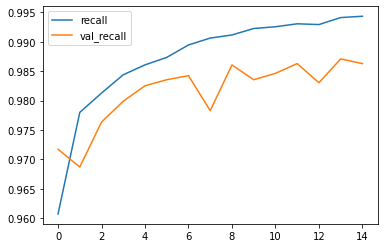

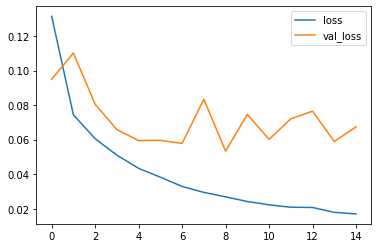

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['precision', 'val_precision']].plot()
pd.DataFrame(history.history)[['recall', 'val_recall']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [ ]:
predict = CNN_model.predict(test_X)

685/685 [==============================] - 7s 9ms/step


In [ ]:
len(predict)

21892

In [ ]:
predict

array([[9.99999940e-01, 1.08515401e-08, 3.45603736e-17, 1.13645393e-18,
        1.59681595e-19],
       [9.99565303e-01, 2.24906908e-04, 1.76126006e-04, 3.58391821e-06,
        3.01117580e-05],
       [9.99999940e-01, 3.97777136e-08, 1.97852179e-15, 7.58621427e-15,
        4.98152316e-15],
       ...,
       [1.10955185e-07, 1.94499483e-09, 7.55414291e-08, 1.41897382e-14,
        9.99999762e-01],
       [1.68547500e-18, 1.37283722e-22, 1.68873240e-17, 2.48218757e-25,
        1.00000000e+00],
       [4.16297874e-16, 2.21639426e-18, 7.20366891e-11, 3.81638966e-17,
        1.00000000e+00]], dtype=float32)

### 10) Confusion matrix of the CNN model.

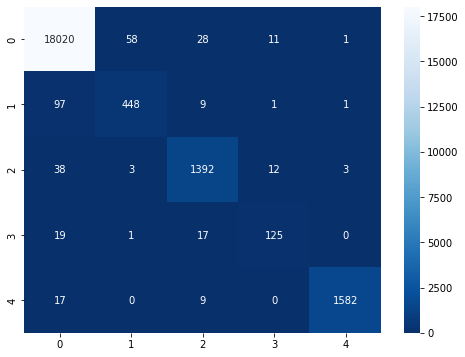

In [ ]:
yhat = np.argmax(predict, axis = 1)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(np.argmax(test_y, axis =1), yhat), annot = True, fmt = '0.0f', cmap= 'Blues_r')

### 11) Building the AlexNet model.


In [ ]:
alexNet_model=Sequential()

alexNet_model.add(Conv1D(filters=96, activation='relu', kernel_size=11, strides=4, input_shape=(187,1)))
alexNet_model.add(BatchNormalization())
alexNet_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

alexNet_model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
alexNet_model.add(BatchNormalization())
alexNet_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

alexNet_model.add(Conv1D(filters=384, padding='same', kernel_size=3, activation='relu'))
alexNet_model.add(Conv1D(filters=384, kernel_size=3, activation='relu'))
alexNet_model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
alexNet_model.add(BatchNormalization())
alexNet_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

alexNet_model.add(Flatten())
alexNet_model.add(Dense(4096, activation='relu'))
alexNet_model.add(Dropout(0.4))
alexNet_model.add(Dense(4096, activation='relu'))
alexNet_model.add(Dropout(0.4))
alexNet_model.add(Dense(5, activation='softmax'))

alexNet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',
                                                                                    keras.metrics.Precision(name='precision'),
                                                                                    keras.metrics.Recall(name='recall'),
                                                                                    tfa.metrics.F1Score(num_classes=5)])

In [ ]:
alexNet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 45, 96)            1152      
                                                                 
 batch_normalization_3 (Batc  (None, 45, 96)           384       
 hNormalization)                                                 
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 23, 96)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 23, 256)           123136    
                                                                 
 batch_normalization_4 (Batc  (None, 23, 256)          1024      
 hNormalization)                                                 
                                                      

### 12) Training the AlexNet model.

In [ ]:
alexNet_model_history = alexNet_model.fit(X, y, epochs = 15, batch_size = 100, validation_data = (valid_X, valid_y))

Epoch 1/15
701/701 [==============================] - 542s 771ms/step - loss: 0.2210 - accuracy: 0.9459 - precision: 0.9530 - recall: 0.9391 - f1_score: 0.7274 - val_loss: 0.1408 - val_accuracy: 0.9681 - val_precision: 0.9710 - val_recall: 0.9656 - val_f1_score: 0.7319
Epoch 2/15
701/701 [==============================] - 533s 760ms/step - loss: 0.1126 - accuracy: 0.9702 - precision: 0.9731 - recall: 0.9672 - f1_score: 0.8373 - val_loss: 0.1533 - val_accuracy: 0.9543 - val_precision: 0.9582 - val_recall: 0.9485 - val_f1_score: 0.8238
Epoch 3/15
701/701 [==============================] - 527s 752ms/step - loss: 0.0953 - accuracy: 0.9751 - precision: 0.9773 - recall: 0.9729 - f1_score: 0.8657 - val_loss: 0.0877 - val_accuracy: 0.9755 - val_precision: 0.9778 - val_recall: 0.9734 - val_f1_score: 0.8601
Epoch 4/15
701/701 [==============================] - 528s 753ms/step - loss: 0.0801 - accuracy: 0.9788 - precision: 0.9806 - recall: 0.9768 - f1_score: 0.8767 - val_loss: 0.1028 - val_accur

### 13) Evaluating the AlexNet model.Accuracy is 98.34.

In [ ]:
alexNet_model.evaluate(test_X, test_y)

685/685 [==============================] - 41s 60ms/step - loss: 0.0841 - accuracy: 0.9834 - precision: 0.9844 - recall: 0.9825 - f1_score: 0.9016


[0.08409865945577621,
 0.9834185838699341,
 0.9843935966491699,
 0.9825050234794617,
 array([0.99144226, 0.80042243, 0.9581882 , 0.7692308 , 0.98878515],
       dtype=float32)]

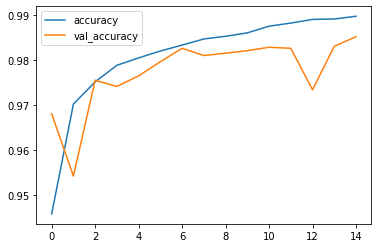

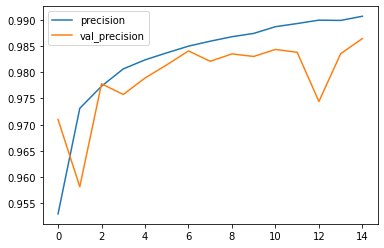

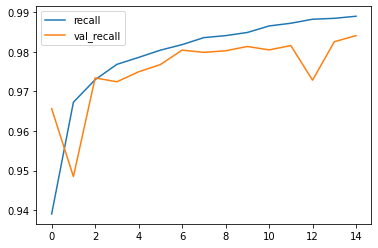

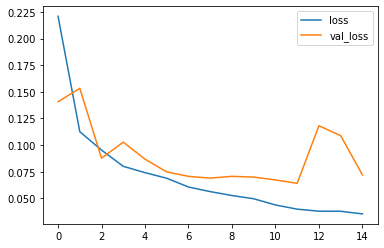

In [ ]:
pd.DataFrame(alexNet_model_history.history)
pd.DataFrame(alexNet_model_history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(alexNet_model_history.history)[['precision', 'val_precision']].plot()
pd.DataFrame(alexNet_model_history.history)[['recall', 'val_recall']].plot()
pd.DataFrame(alexNet_model_history.history)[['loss', 'val_loss']].plot()

In [ ]:
predict_alexNet = alexNet_model.predict(test_X)

685/685 [==============================] - 41s 60ms/step


### 14)  Confusion matrix of the AlexNet model.

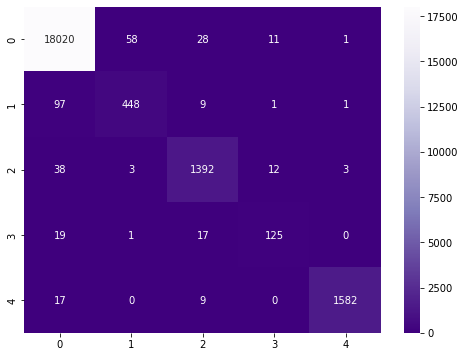

In [ ]:
alexNet_yhat = np.argmax(predict, axis = 1)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(np.argmax(test_y, axis =1), alexNet_yhat), annot = True, fmt = '0.0f', cmap= 'Purples_r')

### 15) Building LSTM model.

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(187,1)))
lstm_model.add(Dense(128, activation = 'relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(5, activation = 'softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',
                                                                                    keras.metrics.Precision(name='precision'),
                                                                                    keras.metrics.Recall(name='recall'),
                                                                                    tfa.metrics.F1Score(num_classes=5)])

In [ ]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 25,861
Trainable params: 25,861
Non-trainable params: 0
_________________________________________________________________


### 16) Training the LSTM model.

In [ ]:
lstm_model_history = lstm_model.fit(X, y, epochs = 20, batch_size = 100, validation_data = (valid_X, valid_y))

Epoch 1/20
701/701 [==============================] - 149s 210ms/step - loss: 0.6796 - accuracy: 0.8276 - precision: 0.8290 - recall: 0.8083 - f1_score: 0.1843 - val_loss: 0.6404 - val_accuracy: 0.8285 - val_precision: 0.8311 - val_recall: 0.8250 - val_f1_score: 0.1880
Epoch 2/20
701/701 [==============================] - 150s 214ms/step - loss: 0.6472 - accuracy: 0.8280 - precision: 0.8311 - recall: 0.8251 - f1_score: 0.1931 - val_loss: 0.6355 - val_accuracy: 0.8277 - val_precision: 0.8313 - val_recall: 0.8241 - val_f1_score: 0.1983
Epoch 3/20
701/701 [==============================] - 143s 204ms/step - loss: 0.6448 - accuracy: 0.8275 - precision: 0.8302 - recall: 0.8247 - f1_score: 0.1901 - val_loss: 0.6437 - val_accuracy: 0.8287 - val_precision: 0.8291 - val_recall: 0.8285 - val_f1_score: 0.1867
Epoch 4/20
701/701 [==============================] - 143s 204ms/step - loss: 0.6300 - accuracy: 0.8288 - precision: 0.8336 - recall: 0.8234 - f1_score: 0.2003 - val_loss: 0.6571 - val_accur

### 17) Evaluating the LSTM model.Accuracy is 94.10.

In [ ]:
lstm_model.evaluate(test_X, test_y)

685/685 [==============================] - 16s 24ms/step - loss: 0.2351 - accuracy: 0.9410 - precision: 0.9448 - recall: 0.9382 - f1_score: 0.6353


[0.2350524216890335,
 0.9410287141799927,
 0.9448406100273132,
 0.938150942325592,
 array([0.9687852, 0.5370844, 0.7579108, 0.       , 0.9127382],
       dtype=float32)]

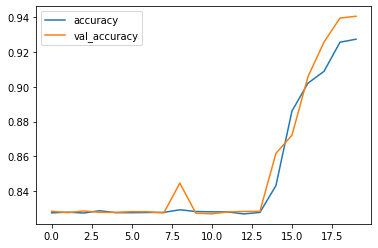

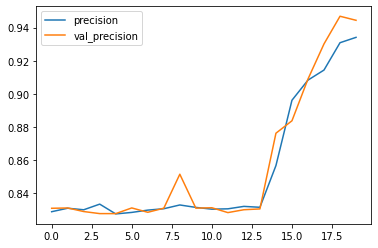

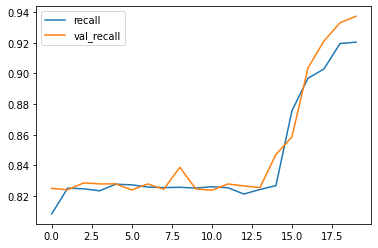

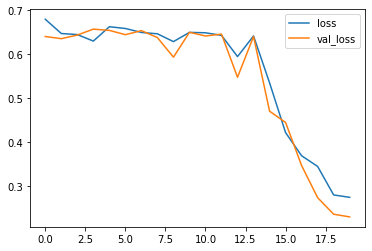

In [ ]:
pd.DataFrame(lstm_model_history.history)
pd.DataFrame(lstm_model_history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(lstm_model_history.history)[['precision', 'val_precision']].plot()
pd.DataFrame(lstm_model_history.history)[['recall', 'val_recall']].plot()
pd.DataFrame(lstm_model_history.history)[['loss', 'val_loss']].plot()

In [ ]:
predict_lstm = lstm_model.predict(test_X)


685/685 [==============================] - 16s 23ms/step


### 18) Confusion matrix of the LSTM model.

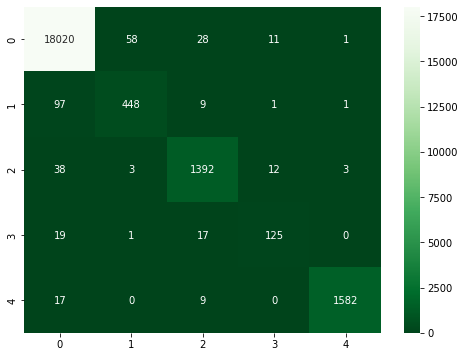

In [ ]:
lstm_yhat = np.argmax(predict, axis = 1)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(np.argmax(test_y, axis =1), lstm_yhat), annot = True, fmt = '0.0f', cmap= 'Greens_r')